INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c0de4786b485ca8a1cbf2dd13dc1550b NOW.


Intercept    37.987848
holiday      30.941807
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 15 May 2019   Prob (F-statistic):           2.87e-29
Time:                        18:48:26   Log-Likelihood:                -745.65
No. Observations:                 209   AIC:                             1495.
Df Residuals:                     207   BIC:                             1502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

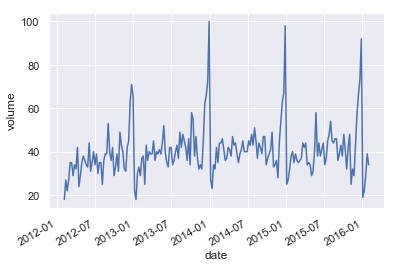

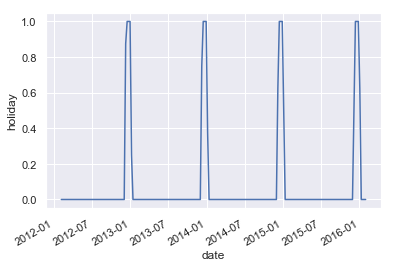

In [1]:
'''
Problem 16.2 Hangover holiday regressiona
Ben Lambert 'A Student's Guide to Bayesian Statistics'
'''

import pystan as stan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statsmodels.formula.api as sm


#nice plot aesthetic
sns.set()  
%matplotlib inline

    
#Read data
data=pd.read_csv("all_data\\stan_hangover.csv")
data['date'] = pd.to_datetime(data.date, format='%Y-%m-%d') #make the date column into date objects

data.head() # Preview the first 5 lines of the loaded data 
data.describe()

#Plot the search volume data
fig, ax = plt.subplots()
sns.lineplot(x="date", y="volume",data=data)
fig.autofmt_xdate()

fig, ax = plt.subplots()
sns.lineplot(x="date", y="holiday",data=data)
fig.autofmt_xdate()

#Regression
result = sm.ols(formula="volume ~ holiday", data=data).fit()
print(result.params)
print(result.summary())

#Specify data for Stan model
N=data[['volume']].count()[0] #Number of data points
search_vol=data.loc[:,'volume'].values #get values from panda into array
holiday=data.loc[:,'holiday'].values #get values from panda into array

#Fit Stan model
model = stan.StanModel(file='hangover.stan')
fit = model.sampling(data={'N':N,'Y':search_vol,'H':holiday},iter=1000,chains=4, seed=1)

print(fit)



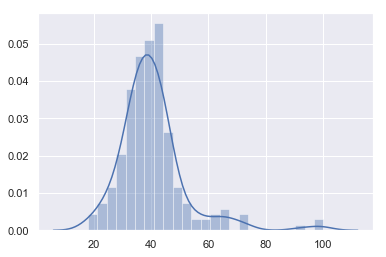

In [103]:
sns.distplot(search_vol)